# Laboratorio 2

Integrantes: 

    - Francis Aguilar - 22243 
    - Diego García - 22404 
    - Angela García -22869 

Enlace al repositorio: https://github.com/angelargd8/lab2-modsim


# Ejercicio 1 - Retardos de primer orden y sistemas lineales

### Teoría

**1. Defina un retraso de primer orden y explique sus dos formulaciones**<br>
Es un tipo de respuesta lenta que pasa cuando una variable va cambiando de forma gradual cuando cambia su entrada. La primera fórmula es la formulación en términos de pendiente:
$$
\frac{dX(t)}{dt} = \frac{Entrada(t) - X(t)}{T}
$$
en donde:

X(t): la variable que se ve afectada por el retraso<br>
Entrada(t): valor que se desea alcanzar<br>
T: tiempo de retraso<br>

Y la segunda fórmula es la formulación en términos de flujo:
$$
X(t + Δt) = X(t) + \frac{Entrada(t) - X(t)}{T} * Δt
$$
en donde:

X(t): la variable que se ve afectada por el retraso<br>
Entrada(t): valor que se desea alcanzar<br>
T: tiempo de retraso<br>
Δt: paso del tiempo <br>

**2. Seguimiento de flujo (salida = stock/retardo)**<br>
Se usa para modelar situaciones donde el flujo de salida es constante en promedio y depende solo del contenido dle stock.
$$
Salida(t) = \frac{Stock(t)}{Retardo}
$$
en donde:

Salida(t): es lo que "sale" del sistema cada unidad de tiempo<br>
Stock(t): cantidad acumulada que se está "retardando"<br>
Retardo: es el tiempo promedio que tarda en vaciarse o procesarse ese stock<br>

**3. Búsqueda de objetivo (flujo = (objetivo - stock)/retardo)**<br>
Ajusta el stock de manera gradual, dependiendo de qué tan lejos está del objetivo. 
$$
Flujo(t) = \frac{Objetivo(t) - Stock(t)}{Retardo}
$$
en donde:

Flujo(t): cantidad de cambio que ocurre en ese instante
Objetivo(t): valor al que se quiere llegar<br>
Stock(t): valor actual del sistema<br>
Retardo: es el tiempo que tarda en alcanzar el objetivo<br>

**4. Describa la condición de equilibrio (entrada = salida) y cómo los stocks se ajustan exponencialmente.**<br>
Cuando la entrada es igual a la salida, el sistema alcanza el equilibrio. Esto significa que no hay acumulación ni disminución en el stock, por lo que todo el sistema deja de cambiar. Cuando el sistema no está en equilibrio, el stock se va ajustando poco a poco de manera exponencial. Es decir que conforme pasa el tiempo, el cambio se va haciendo más y más lento. 

**5. Explique por qué los sistemas lineales permiten la superposición (las soluciones se pueden sumar).**<br>
La superposición es cuando la respuesta total de varias entradas es igual a la suma de las respuestas individuales de cada entrada. Se puede aplicar en un sistema lineal, porque en ellos las ecuaciones no tienen productos, potencias, ni funciones no lineales entre variables y todo está en forma proporcional. Esto permite analizar partes del sistema por separado y luego combinarlas. 

**6. Dado un stock con un valor inicial de 100, una entrada de 5/día y un retraso de 10 días:**<br>
**a. Calcule el valor de equilibrio del stock.**<br>
Para ello, la entrada debe ser igual a la salida. Siguiendo la fórmula:
$$
Salida = \frac{Stock}{Retardo}
$$
Tenemos que
$$
5 = \frac{Stock}{10} => Stock = 5*10 = 50
$$
El valor de equilibrio del stock es de 50.

**b. Dibuje la trayectoria del stock de salida a lo largo del tiempo.**<br>
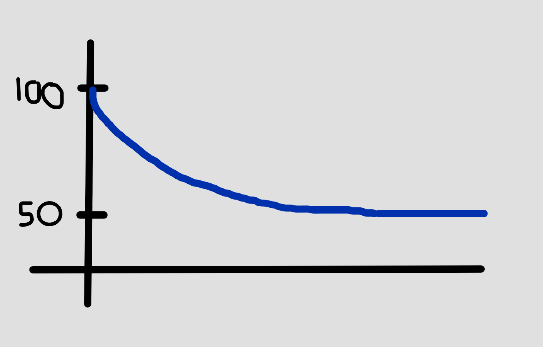

**c. Compare los retrasos sin memoria y los retrasos por etapas (distribuciones de Erlang). ¿Cuándo utilizaría cada uno?**<br>
En retraso sin memoria la salida depende solo del valor actual del stock, la probabilidad de salir es igual en todo momento y su comportamiento es más suave y gradual. Se utiliza cuando no importa cuánto tiempo lleva un elemento en el sistema. Por otro lado, el retraso por etapas divide el retraso total en varias etapas iguales, cada una con su propio mini stock y salida. Además, produce un retraso más definido y predecible y la salida es más concentrada en torno al tiempo promedio. Se utiliza cuando se espera que los elementos salgan cerca de cierto tiempo específico.

### Práctica

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
dias = 50
dt = 1
pasos = int(dias / dt)
retraso = 5  # días
entrada_base = 10  # por día
entrada_cambio = 20  # nuevo valor de entrada después del día de cambio
dia_cambio = 25

In [2]:
# Inicialización
stock = np.zeros(pasos)
salida = np.zeros(pasos)
entrada = np.zeros(pasos)

In [ ]:
# Definir entrada con cambio en el día de cambio
for t in range(pasos):
    if t < dia_cambio:
        entrada[t] = entrada_base
    else:
        entrada[t] = entrada_cambio

# Simulación
for t in range(1, pasos):
    salida[t - 1] = stock[t - 1] / retraso
    d_stock = entrada[t - 1] - salida[t - 1]
    stock[t] = stock[t - 1] + d_stock * dt

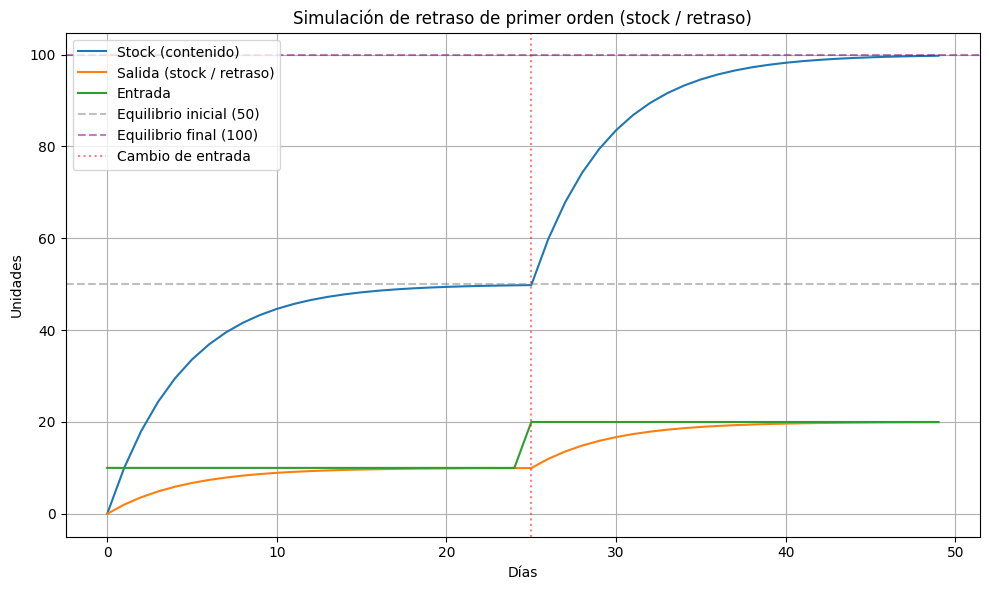

In [7]:
# Calcular última salida
salida[-1] = stock[-1] / retraso

# Tiempo
tiempo = np.arange(0, dias, dt)

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(tiempo, stock, label='Stock (contenido)')
plt.plot(tiempo, salida, label='Salida (stock / retraso)')
plt.plot(tiempo, entrada, label='Entrada')

# Líneas de equilibrio esperadas
equilibrio1 = entrada_base * retraso
equilibrio2 = entrada_cambio * retraso
plt.axhline(equilibrio1, color='gray', linestyle='--', alpha=0.5, label='Equilibrio inicial (50)')
plt.axhline(equilibrio2, color='purple', linestyle='--', alpha=0.5, label='Equilibrio final (100)')
plt.axvline(dia_cambio, color='red', linestyle=':', alpha=0.5, label='Cambio de entrada')

# Estética
plt.xlabel('Días')
plt.ylabel('Unidades')
plt.title('Simulación de retraso de primer orden (stock / retraso)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

En la gráfica se puede apreciar como el sistema con retraso de primer orden se va acomodando al cambio de entrada con el paso del tiempo hasta llegar a un punto de estabilidad. Lo podemos ver, tanto al inicio, como cuando la entrada cambia en el día 25. Las lineas verde y naranja muestran como cambian la entrada y la salida al llegar al día 25. Como la entrada se duplica en este día, el punto donde el stock es estable también lo hace.

# Ejercicio 2 - Retroalimentación Retrasada y Oscilaciones

### Teoría
**1. Explique cómo los retrasos en la percepción causan oscilaciones (p. ej., analogía del termostato).** 

Los retrasos en la percepción pueden causar oscilaciones, ya que en un sistema dinámico si un agente percibe con retardo el estado actual de una variable, entonces las acciones que toma están basadas en la información desactualizada. Por lo tanto, lo que provoca es sobrecompensación, correcciones excesivas o tardías. Por eso en los sistemas cuando responden a información desfasada tienden al sobre ajuste que causa oscilaciones.


**2. Deduzca por qué bucles de equilibrio + retrasos → sobreimpulso/insuficiencia.**

Un bucle equilibrado es un mecanismo que corrige desviaciones para mantener una variable cerca de un objetivo y cuando hay retraso el sistema actua con la información pasada y da un sobreimpulso o insuficiencia porque el sistema aún cree que falta correguir, entonces sigue actuando, peromo como la acción ya estaba teniendo efecto lo lleva a tener una corrección y se pasa del objetivo o insuficiencia porque da una corrección muy pequeña, entonces no llega al objetivo. 

La deducción sería:
$$
\frac{dx(t)}{dt} = \text{K} * (x^* - x(t-τ_p))
$$

en donde:
$$
x(t):\text{estado actual del sistema} 
x^*:\text{objetivo o set point} 
τ:\text{retraso en la percepción} 
K:\text{ganancia del controlador} 
$$

Entonces cuando:
$$
x(t-τ)<x^*
$$
el sistema actúa como si aún estuviera por debajo del objetivo que es un sobreimpulso

Y cuando finalmente :
$$
x(t)> x^*
$$
es cuando el sistema aún no lo ve que es una oscilación



**3. Analice y discuta ejemplos reales (ciclos económicos, respuestas a pandemias)**

Un ejemplo real como respuestas a pandemia, como el covid-19. El retraso puede ser los casos detectado por días o semanas después, por todo lo que conlleva la prueba y los reportes. Entonces, al tener algo de retraso en los reportes, las políticas tardan en aplicarse, entonces las medidas no tienen un efecto inmediato.

Por ejemplo en los gobiernos al subestimar la gravedad responden tarde y para compensar impone medidas muy fuertes lo que hace que los casos bajen. Pero al relajar las medidas muy pronto los casos vuelven a subir, lo que genera un ciclo de olas epidémicas, que son las oscilaciones.

Un ejemplo, en mundo como se vió la pandemia fue: 
1. primera ola, en donde crecio rápido y sin preparación
2. respuesta tardía y fuerte, que hubo un confinamiento total
3. los casos bajaron y hubo un alivio prematuro a las medidas
4. segunda ola, por apertura acelerada
6. nuevo confinamiento


**4. Para una acción con un objetivo de 100 y un retraso en la percepción de 20 días:**

**a. Prediga la magnitud del sobreimpulso si el retraso del ajuste es de 10 días**

$$
x^* - \text{Objetivo : 10} 
$$
$$
τ_p - \text{ Retraso en la percepcion: 20} 
$$
$$
τ_a - \text{ Retraso en el ajuste: 10} 
$$


$$
\frac{dx(t)}{dt} = \text{K} * (x^* - x(t-τ_p))
$$

Ya que 
$$
x < 100
$$


La estimación simplificada del sobreimpulso sería:

$$
\text{S} \approx K \cdot \Delta x \cdot e^{λ (τ_p + τ_a)}
$$

en donde 

$$
\Delta x : (x^* - x_0) \text{ que es el error inicial}

$$
$$
λ: \text{constante de sensibilidad del sistema}
$$

$$
e^{λ (τ_p + τ_a)} : \text{magnificación del error por el retardo acumulado}
$$

Colocando todo en la formula:
$$
\text{S} \approx  1 \cdot 50 x \cdot e^{1.5}
\text{S} =  224
$$

El resultado demuestra una corrección exesiva de 224, cuando realmente solo se necesitaban 50.



**b. ¿Cómo podría una recopilación más rápida de datos reducir las oscilaciones de las políticas?**

Definitivamente una recopilación más rápida de datos reduce las oscilaciones de las políticas, por lo anteriormente hablado ya que disminuye el retardo en la percepción, ya que los datos son más recientes, las deciciones se basan en el estado actual y no en lo que paso días antes o semanas antes .Entonces, permite tomar decisiones más precisas. 



### Práctica

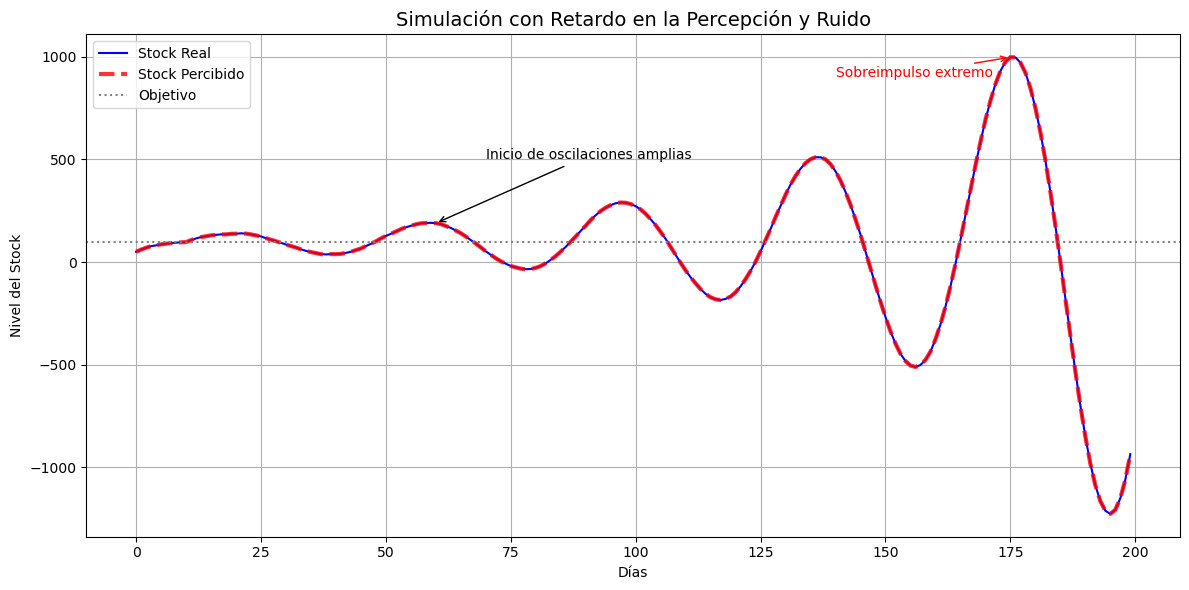

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import ace_tools_open as tools

#crear un modelo con retrasos de percepcion y visualice las oscilaciones
#crear un stock real que se ajusta a un objetivo
#crear un stock percibido con retrasos
#usar el stock para retroalimentacion (flujo = ( objetivo - percibido) / retraso)
#add ruido a la percepcion y observar su escalabilidad
stock_real = [50]
stock_percibido = [50]
dias = 200 
#los dias de retraso
retraso_percepcion = 10 
retraso_ajuste=5
ruido_amplitud = 5
#ganancia
K= 1
objetivo= 100
#simular con los 200 dias
for t in range(1, dias):

    #percepcion retrasada + ruido
    if len(stock_percibido) <= retraso_percepcion:
        percepcion = stock_percibido[-1] + np.random.normal(0, ruido_amplitud)
    else:
        percepcion = stock_percibido[-(retraso_percepcion + 1)] + np.random.normal(0, ruido_amplitud)
    
    #retroalimentacion (flujo = ( objetivo - percibido) / retraso)
    flujo = K * (objetivo - percepcion) / retraso_ajuste

    #actualizar el real
    nuevo_stock=stock_real[-1] + flujo
    stock_real.append(nuevo_stock)

    #actualizar el percibido
    stock_percibido.append(nuevo_stock)



stock_percibido_plot = stock_percibido[-dias:]

# Graficar resultados
plt.figure(figsize=(12, 6))
plt.plot(stock_real, label="Stock Real", linewidth=1.5, color ="blue")
plt.plot(stock_percibido_plot, label="Stock Percibido", linestyle='--', alpha=0.8, color ="red", linewidth=3)
plt.axhline(objetivo, color='gray', linestyle=':', label="Objetivo")
plt.title("Simulación con Retardo en la Percepción y Ruido", fontsize=14)
# plt.fill_between(range(dias), stock_real, stock_percibido_plot, color='blue', alpha=0.5, label='Diferencia Real vs Percibida')
plt.annotate("Inicio de oscilaciones amplias", xy=(60, stock_real[60]), xytext=(70, 500),
             arrowprops=dict(arrowstyle="->", color="black"),
             fontsize=10, color="black")
plt.annotate("Sobreimpulso extremo", xy=(175, stock_real[175]), xytext=(140, 900),
             arrowprops=dict(arrowstyle="->", color="red"),
             fontsize=10, color="red")
plt.xlabel("Días")
plt.ylabel("Nivel del Stock")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Lo que se puede observar en el gráfico es que existen varias oscilaciones. Que en un principio no se ve tan marcado las oscilaciones porque se ve que son amortiguadas y luego comienza a divergir al acumular errores de percepción. Luego de los 60 días, las oscilaciones comienzan a ser más grandes y donde definitivamente las oscilaciones se nota demasiado el sobreimpulso es luego de las 175 días. Lo que pasa es una falta de amortiguación, porque eso hace que el sistema se sobrecorriga y hace que haya resonancia con el retardo. 

# Ejercicio 3 - Sistemas no lineales y modelado SIR

# Referencias: 

Ciclos de retroalimentacion respuesta retrasada las consecuencias de la respuesta retrasada en los ciclos de retroalimentacion. (s. f.). FasterCapital. Recuperado 28 de julio de 2025, de https://fastercapital.com/es/contenido/Ciclos-de-retroalimentacion--respuesta-retrasada--las-consecuencias-de-la-respuesta-retrasada-en-los-ciclos-de-retroalimentacion.html
